# Linear and Multiple Linear Regression

In this lab you will practice performing linear and multiple regression. To begin, import the following libraries:

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Then, we'll import the dataset:

In [2]:
# Reading the dataset
df = pd.read_parquet('final_dataset.parquet')

In [3]:
df.head()

,date,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca,target
0,2010-02-14,0.0,36,13,20.52,136.0,3.619512,0.190574,0
1,2010-02-15,0.0,41,7,20.51,129.0,3.470118,0.209177,0
2,2010-02-16,0.0,43,8,20.51,130.0,3.433721,0.197542,0
3,2010-02-17,0.0,51,10,20.51,132.0,3.351107,0.135033,0
4,2010-02-18,0.0,51,16,20.50,135.0,3.238121,0.107690,0


In this part, you will generate a boxplot and remove outliers using IQR method. To begin, replace NaN values with 0 and filter the dataset to use `date`, `max_temp`, and `sm_pca`. After cleaning and filtering your dataset, generate the boxplot and remove outliers using IQR.

In [4]:

# your code here
# raise NotImplementedError
df = df.fillna(0)
df = df[['date', 'max_temp', 'sm_pca']]
df.head()

,date,max_temp,sm_pca
0,2010-02-14,36,3.619512
1,2010-02-15,41,3.470118
2,2010-02-16,43,3.433721
3,2010-02-17,51,3.351107
4,2010-02-18,51,3.238121


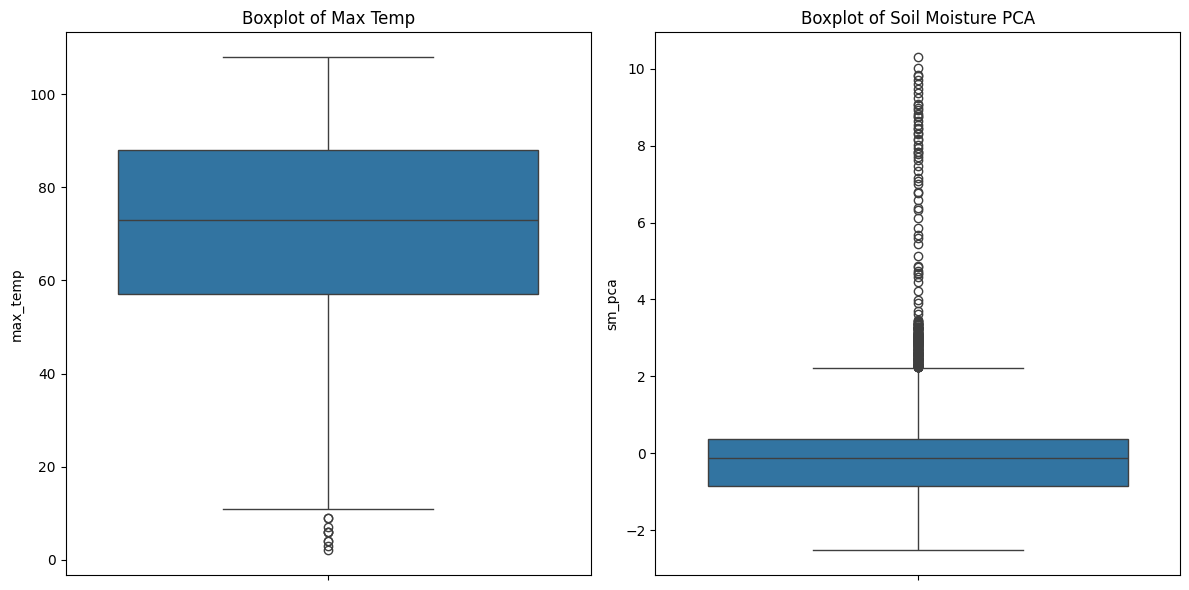

In [5]:
import seaborn as sns

# Generate boxplot for 'max_temp' and 'sm_pca'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['max_temp'])
plt.title('Boxplot of Max Temp')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['sm_pca'])
plt.title('Boxplot of Soil Moisture PCA')

plt.tight_layout()
plt.show()

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers for 'max_temp' and 'sm_pca'
df = remove_outliers_iqr(df, 'max_temp')
df = remove_outliers_iqr(df, 'sm_pca')

In [6]:
assert (df.shape == (4632, 3), "Check that your dataframe is filtered correctly.")
assert (np.isclose(df['max_temp'].mean(), 72.173143)), "Check that you have removed outliers correctly for max_temp."
assert (np.isclose(df['sm_pca'].mean(), -0.258722)), "Check that you have removed outliers correctly for sm_pca."
assert (np.isclose(df['max_temp'].min(), 11.000000)), "Check that you have removed outliers correctly for max_temp."
assert (np.isclose(df['sm_pca'].max(), 2.233630)), "Check that you have removed outliers correctly for sm_pca."

<>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-6-4f95a85b7c63>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (df.shape == (4632, 3), "Check that your dataframe is filtered correctly.")


Next, we'll split the data into training and testing sets before performing a linear regression using `LinearRegression()` and fitting the training data. Remember to reshape your data.

After performing the linear regression, you should generate a graph similar to the following:

![image.png](attachment:image.png)


In [7]:
# Splitting data into training and test set using sklearn
X_train, X_test, y_train, y_test = train_test_split(df['max_temp'], df['sm_pca'], test_size=0.25, random_state=0)

# Looking at training data and test data

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,max_temp
2803,66
1495,78
1973,98
1159,60
3771,98


,sm_pca
2803,1.192699
1495,0.408074
1973,-0.500562
1159,-0.393938
3771,-1.645886


,max_temp
394,71
593,68
1873,67
3975,44
3333,83


,sm_pca
394,-0.289785
593,-0.749500
1873,0.309108
3975,0.020986
3333,-1.529026


In [8]:
# your code here
# raise NotImplementedError

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

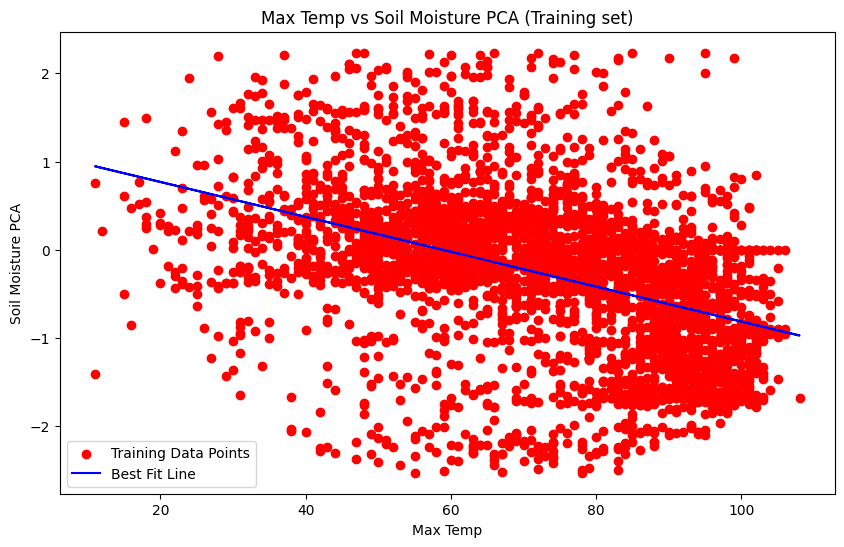

In [9]:
# Visualizing the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red')

# Plotting the best fit line
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Max Temp vs Soil Moisture PCA (Training set)')
plt.xlabel('Max Temp')
plt.ylabel('Soil Moisture PCA')
plt.legend(['Training Data Points', 'Best Fit Line'])
plt.show()

Finally, you will calculate the mean squared error (MSE) and the R2 score for both the training and test data.

In [10]:
# your code here
# raise NotImplementedError

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


print(f'Mean Squared Error for Training data: {mse_train}')
print(f'R2 Score for Training data: {r2_train}')
print(f'Mean Squared Error for Test data: {mse_test}')
print(f'R2 Score for Test data: {r2_test}')

Mean Squared Error for Training data: 0.7083519834616381
R2 Score for Training data: 0.17656709200883003
Mean Squared Error for Test data: 0.8355896065171731
R2 Score for Test data: 0.1283955991150405
